In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

In [2]:
sales_trends_df = pd.read_excel('../data/sales_trends.xlsx')

#### **Get Predict Time Series using LSTM Methods**

In [3]:
def create_sequences(data, sequence_length):
    sequences = []
    target = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        label = data[i+sequence_length]
        sequences.append(seq)
        target.append(label)
    return np.array(sequences), np.array(target)

In [4]:
# prepare the data from task1.transaction
values = np.array(sales_trends_df.transaction_id)
percent_train = 0.8
size_data_train = int(np.round(len(values) * percent_train))

# split the data into train and test data
train = values[:size_data_train]
test = values[size_data_train:]

sequence_length = 7 # 7 days ago

# apply create_sequences function to get the target data
x_train, y_train = create_sequences(train, sequence_length)
x_test, y_test = create_sequences(test, sequence_length)

# create the model with Sequential Methods
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))  # Layer pertama dengan return_sequences=True
model.add(LSTM(50, activation='relu'))  # Hidden layer LSTM
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')  # Mean Squared Error
model.fit(x_train, y_train, epochs=100, batch_size=16, verbose=0)

# Predict using 7 days ago
initial_seq = values[-7:]
predicted_values = []
for i in range(28):
    predicted_value = model.predict(np.array([initial_seq]), verbose=0)[0][0]
    predicted_values.append(predicted_value)
    initial_seq = np.append(initial_seq[1:], predicted_value)

# create the data as transaction
transaction = pd.DataFrame({'transaction':values})
transaction['status']='actual'
data_ = pd.DataFrame({'transaction':predicted_values})
data_['status']='predicted'
transaction=pd.concat([transaction, data_])

2024-03-13 16:00:03.881017: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-03-13 16:00:03.881045: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-13 16:00:03.881058: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-13 16:00:03.881516: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-13 16:00:03.881815: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2024-03-13 16:00:06.430421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


In [5]:
# prepare the data from transaction_qty
values = np.array(sales_trends_df.transaction_qty)
percent_train = 0.8
size_data_train = int(np.round(len(values) * percent_train))

# split the data into train and test data
train = values[:size_data_train]
test = values[size_data_train:]

sequence_length = 7 # 7 days ago

# apply create_sequences function to get the target data
x_train, y_train = create_sequences(train, sequence_length)
x_test, y_test = create_sequences(test, sequence_length)

# create the model with Sequential Methods
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1), return_sequences=True)) 
model.add(LSTM(50, activation='relu'))  # Hidden layer LSTM
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')  # Mean Squared Error
model.fit(x_train, y_train, epochs=100, batch_size=16, verbose=0)

# Predict using 7 days ago
initial_seq = values[-7:]
predicted_values = []
for i in range(28):
    predicted_value = model.predict(np.array([initial_seq]), verbose=0)[0][0]
    predicted_values.append(predicted_value)
    initial_seq = np.append(initial_seq[1:], predicted_value)

# create the data as transaction_qty
transaction_qty = pd.DataFrame({'transaction_qty':values})
transaction_qty['status']='actual'
data_ = pd.DataFrame({'transaction_qty':predicted_values})
data_['status']='predicted'
transaction_qty=pd.concat([transaction_qty, data_])

In [6]:
# prepare the data from task1.income
values = np.array(sales_trends_df.income)
percent_train = 0.8
size_data_train = int(np.round(len(values) * percent_train))

# split the data into train and test data
train = values[:size_data_train]
test = values[size_data_train:]

sequence_length = 7 # 7 days before

# apply create_sequences function to get the target data
x_train, y_train = create_sequences(train, sequence_length)
x_test, y_test = create_sequences(test, sequence_length)

# create the model with Sequential Methods
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))  # Layer pertama dengan return_sequences=True
model.add(LSTM(50, activation='relu'))  # Hidden layer LSTM
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')  # Mean Squared Error
model.fit(x_train, y_train, epochs=100, batch_size=16, verbose=0)

# Predict using 7 days before
initial_seq = values[-7:]
predicted_values = []
for i in range(28):
    predicted_value = model.predict(np.array([initial_seq]), verbose=0)[0][0]
    predicted_values.append(predicted_value)
    initial_seq = np.append(initial_seq[1:], predicted_value)

# create the data as income
income = pd.DataFrame({'income':values})
income['status']='actual'
data_ = pd.DataFrame({'income':predicted_values})
data_['status']='predicted'
income=pd.concat([income, data_])

In [7]:
forecast = pd.concat([transaction, transaction_qty[['transaction_qty']], income[['income']]], axis=1)
forecast=forecast[['status','transaction','transaction_qty','income']]
forecast.reset_index(drop=True, inplace=True)

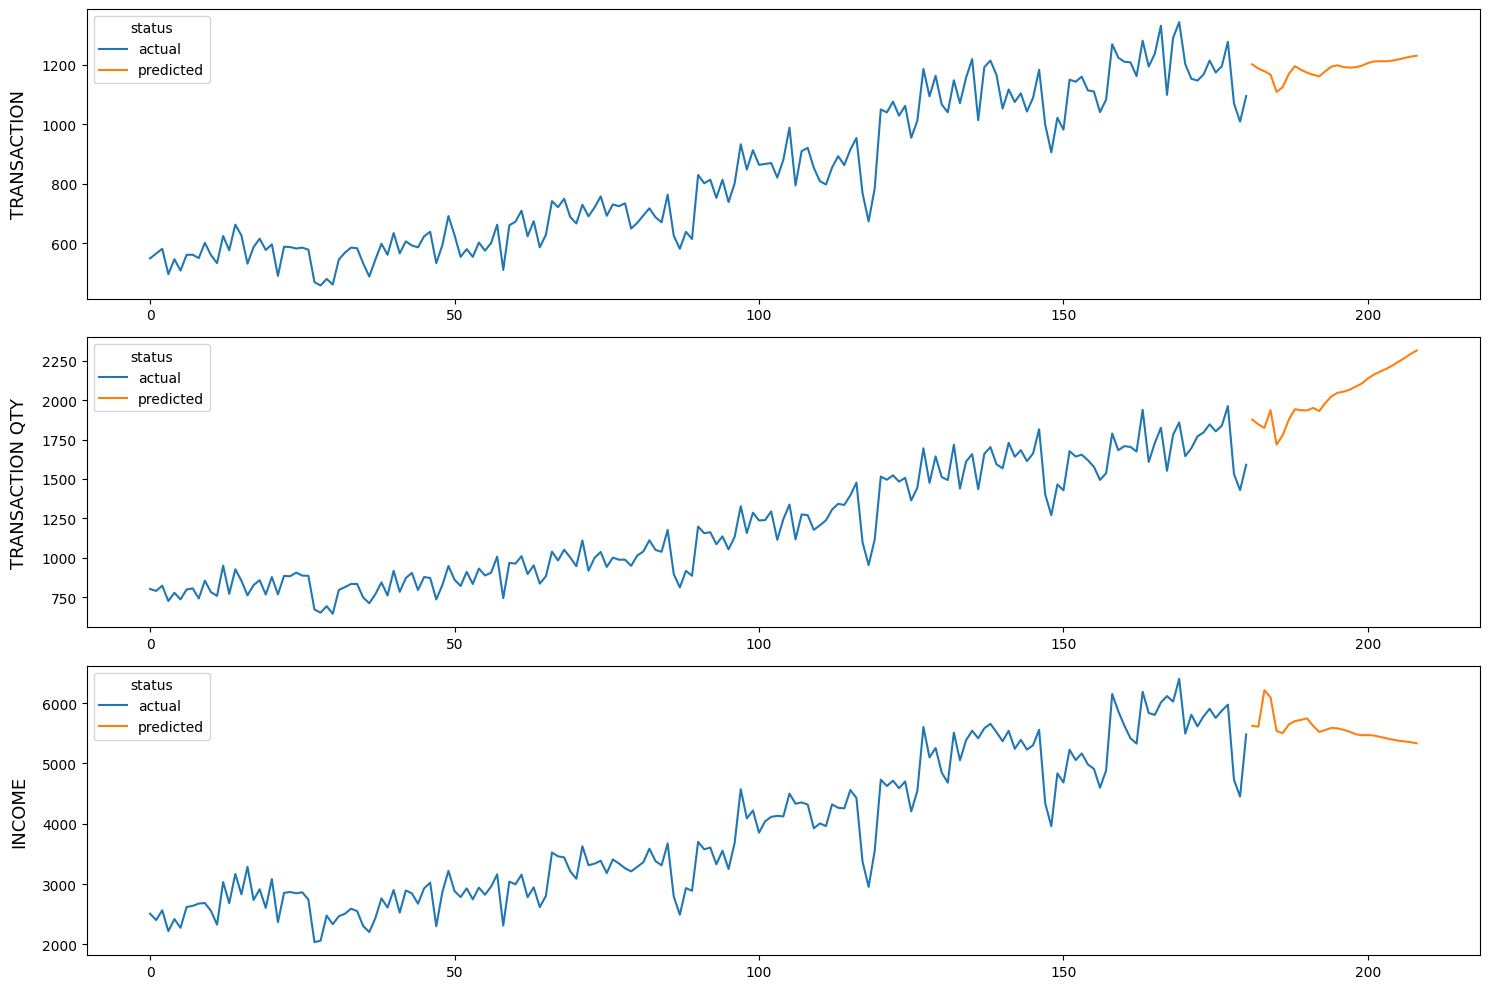

In [8]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

sns.lineplot(forecast, x=np.arange(len(forecast)), y='transaction', hue='status', ax=ax[0])
sns.lineplot(forecast, x=np.arange(len(forecast)), y='transaction_qty', hue='status', ax=ax[1])
sns.lineplot(forecast, x=np.arange(len(forecast)), y='income', hue='status', ax=ax[2])

ax[0].set_ylabel('TRANSACTION', fontsize=13, labelpad=10)
ax[1].set_ylabel('TRANSACTION QTY', fontsize=13, labelpad=10)
ax[2].set_ylabel('INCOME', fontsize=13, labelpad=10)

plt.tight_layout()
plt.show()

**Recommendation:**

Improving the accuracy of predicting daily transaction trends and income, by revisiting the features used in the model, exploring alternative forecasting algorithms, or incorporating additional relevant variables that could enhance the model's predictive capabilities.

By addressing these aspects, the business can enhance the reliability of its forecasting, enabling better anticipation of future trends and facilitating proactive strategies to optimize performance and achieve business objectives.
